<a href="https://colab.research.google.com/github/vap326/cse337/blob/main/lab1-bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Multi-armed Bandits

This lab explores the multi-armed bandit problem, where an agent must choose among multiple options (arms) with unknown reward distributions to maximize its cumulative reward over time.

In [5]:
%pylab inline
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.12/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['seed']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [6]:
# Number of bandit arms
K = 5 # @param {"type":"integer"}
# Number of trials (time steps)
T = 100  # @param {"type":"integer"}

# Random seed
seed = 0

Text(0.5, 1.02, 'Unknown Reward Distributions for K Bandits')

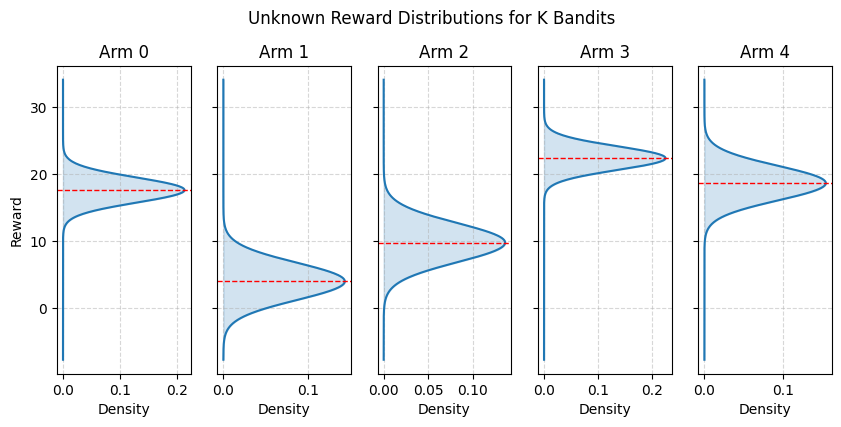

In [7]:
# Stattionary probability distribution for K bandits
np.random.seed(seed)
bandit_mean = 10 * np.random.normal(size=K)
bandit_std = np.random.uniform(1, 3, size=K)




###### Plot disttributions #######
fig, axes = plt.subplots(1, K, figsize=(2*K, 4), sharey=True)

x_min = bandit_mean.min() - 4 * bandit_std.max()
x_max = bandit_mean.max() + 4 * bandit_std.max()
x = np.linspace(x_min, x_max, 500)

for i, ax in enumerate(axes):
    y = norm.pdf(x, loc=bandit_mean[i], scale=bandit_std[i])
    ax.plot(y, x, color="C0")  # vertical orientation
    ax.fill_betweenx(x, 0, y, alpha=0.2, color="C0")
    ax.axhline(bandit_mean[i], color="r", linestyle="--", linewidth=1)  # mean
    ax.set_title(f"Arm {i}")
    ax.set_xlabel("Density")
    if i == 0:
        ax.set_ylabel("Reward")
    ax.grid(True, linestyle="--", alpha=0.5)
plt.suptitle("Unknown Reward Distributions for K Bandits", y=1.02)


Text(0, 0.5, 'Reward')

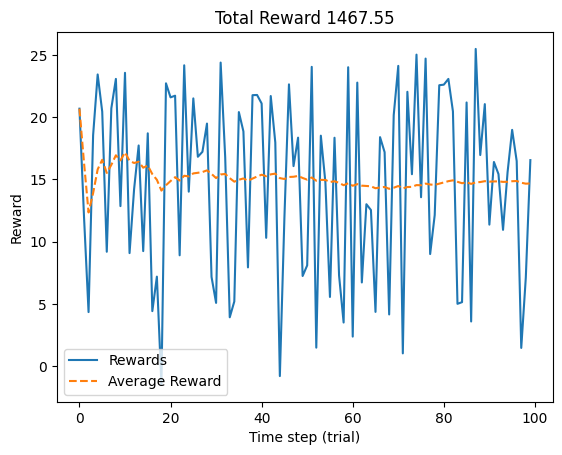

In [8]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
  a = np.random.randint(0, K-1)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")




# ## Exercise 1: Implement Your Own Bandit Policy

In the previous cells, we simulated a multi-armed bandit problem and observed the rewards obtained by choosing arms randomly. While this gives us a baseline, a random policy is unlikely to be the most effective way to maximize rewards.

Your task is to implement your own policy for selecting which bandit arm to pull at each time step `t`. The total reward should be higher than the

Text(0, 0.5, 'Reward')

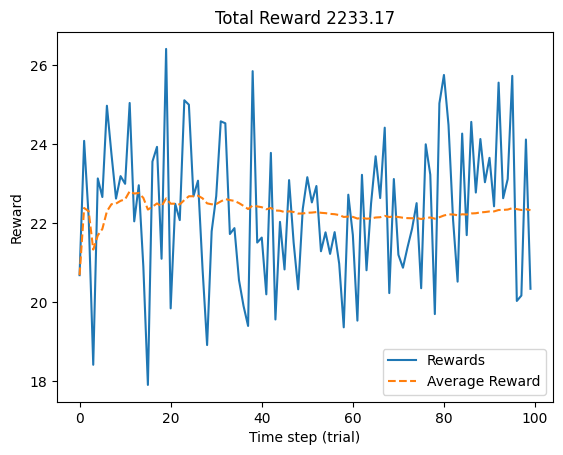

In [9]:
#Exercise 2: Greedy strategy
np.random.seed(seed)

# Rewards
rewards = []
# Create a list of k empty lists
action_rewards = [[] for _ in range(K)]

for a in range(0, K):
  # reward for a arm
  reward = np.random.normal(bandit_mean[a], bandit_std[a])
  # add reward to the list associated with that particular
  action_rewards[a].append(reward)

# compute the mean reward for each arm
avg_rewards = [np.mean(action_reward) for action_reward in action_rewards]

# find the index of  the maximum avg_reward
best_arm = np.argmax(avg_rewards)

# For T trials, chose the best arm
for t in range(T):
  # Action: Choose the arm with the max reward
  a = best_arm ############################ YOUR POLICY HERE #################

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)
  action_rewards[a].append(r)

  # compute the mean reward for each arm
  avg_rewards = [np.mean(action_reward) for action_reward in action_rewards]
  # find the index of  the maximum avg_reward
  best_arm = np.argmax(avg_rewards)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

Text(0, 0.5, 'Reward')

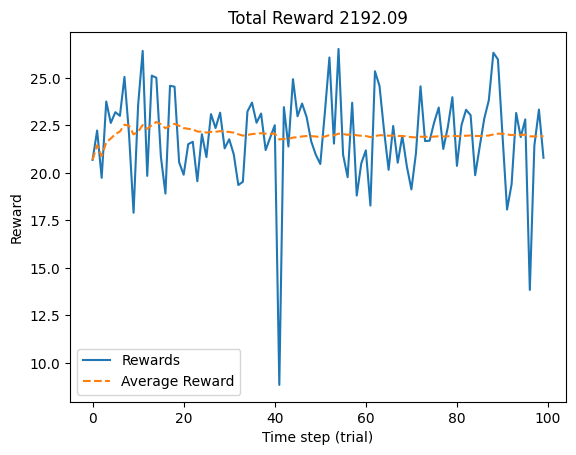

In [13]:
#Exercise 2: Epsilon-greedy strategy
np.random.seed(seed)

# Rewards
rewards = []
# Create a list of k empty lists
action_rewards = [[] for _ in range(K)]

for a in range(0, K):
  # reward for a arm
  reward = np.random.normal(bandit_mean[a], bandit_std[a])
  # add reward to the list associated with that particular
  action_rewards[a].append(reward)

# compute the mean reward for each arm
avg_rewards = [np.mean(action_reward) for action_reward in action_rewards]

# find the index of  the maximum avg_reward
best_arm = np.argmax(avg_rewards)

epsilon = 0.01
# For T trials,
for t in range(T):
 ############################ YOUR POLICY HERE #################
  if np.random.rand() < epsilon:
    a = np.random.randint(0, K-1)
  else:
    a = best_arm

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)
  action_rewards[a].append(r)

  # compute the mean reward for each arm
  avg_rewards = [np.mean(action_reward) for action_reward in action_rewards]
  # find the index of  the maximum avg_reward
  best_arm = np.argmax(avg_rewards)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

## Exercise 2: Greedy strategy


1. Implement the greedy strategy: Always choose the arm with the highest estimated average reward.

2. Implement the Epsilon-greedy strategy: with a small probability epsilon, choose a random arm; otherwise, choose the greedy arm.

3. [Optional for 337] Implement Thompson Sampling: Maintain a probability distribution over the expected reward for each arm and sample from these distributions to choose an arm.



# Questions
After compleing the excercises, answer the following questions:

1. In the epsilon-greedy strategy, compare ε = 0.1 and ε = 0.001. What are the advantages of using a larger ε?
ans: A larger ε will add more randomness, allowing for more exploration.
2. If the reward distribution changes smoothly over time, is a purely greedy strategy still effective?
ans: No since a pure greedy method will stick with what it orginally believed the best arm to be.
3. How does the choice of ε affect the balance between exploration and exploitation in the long run?  
ans: The larger the ε, the more exploration it will do. The smaller the ε, there might be a chance that the algorithm will repetively pick a subobtimal action.
4. Suppose the number of arms increases significantly. How might this change the effectiveness of the epsilon-greedy strategy?  
ans: It would reduce the effectiveness of the epsilon-greedy strategy because the number of arms to be explored will increase significantly.